In [11]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

df_train = pd.read_csv('train.csv')

In [12]:
y = np.array(df_train['SalePrice'])
X = df_train.loc[:, ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea' , 'LotFrontage', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]
X = X.fillna(0).values

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [14]:
class RidgeRegression():
    
    def __init__(self, x_dim):
        self.x_dim = x_dim
        self.W = np.zeros((x_dim + 1))
        
    def predict(self, X):
        X = np.append(np.zeros((X.shape[0])).reshape(-1, 1), X, axis = 1)
        return np.dot(X, self.W)
    
    def train(self, X, y, alpha):
        X = np.append(np.zeros((X.shape[0])).reshape(-1, 1), X, axis = 1)
        try:
            self.W = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + alpha * np.eye(X.shape[1])), X.T), y)
        except Exception as e:
            print("Increase value of Regularizer.")
            
    def test(self, X, y):
        y_pred = self.predict(X)
        error = np.mean(np.sqrt((y_pred - y) ** 2))
        return error

#### Error vs Alpha

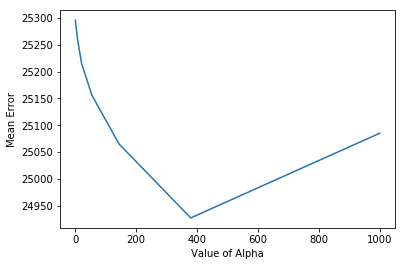

In [15]:
errors = []
for alpha in np.logspace(-5, 3, 20):
    model = RidgeRegression(X.shape[1])
    model.train(X_train, y_train, alpha)
    errors.append(model.test(X_test, y_test))
    
plt.plot(np.logspace(-5, 3, 20), errors)
plt.xlabel("Value of Alpha")
plt.ylabel("Mean Error")
plt.show()